# Preprocessing
---
---

## Imports and Paths
---

In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2


In [2]:
BASE_DIR = os.path.dirname(os.getcwd())
DATA_DIR  = os.path.join(BASE_DIR, 'chest_xray')
MERGED_DIR = os.path.join(BASE_DIR, 'merged')
SPLIT_DIR = os.path.join(BASE_DIR, 'split')

print(BASE_DIR)
print(DATA_DIR)
print(MERGED_DIR)
print(SPLIT_DIR)

/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2
/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2/chest_xray
/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2/merged
/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2/split


In [3]:
from src.preprocessing import merge_splits, split_dataset_with_augmentation
from src.visualizations import plot_dataset_distribution, plot_image_grid_all_subsets

In [4]:
issues = merge_splits(DATA_DIR, MERGED_DIR)

Merging completed successfully.


In [5]:
# Define augmentation configuration
augment_config = {
    'apply_to_splits': ['train'],    # Apply augmentation to training split
    'intensity': 'moderate',         # or 'light', 'strong'
    'augmentations_per_image': 2,    # Number of augmented versions per original
    'variants_per_image': 3,         # Number of different augmentation variants
    'balance_classes': True,         # Balance NORMAL vs PNEUMONIA classes
    'img_size': 224                  # Resize all images to 224x224
}

# Now call with the config
split_dataset_with_augmentation(
    inpath=MERGED_DIR, 
    savepath=SPLIT_DIR,
    train_frac=0.8, 
    val_frac=0.1, 
    test_frac=0.1,
    augment_config=augment_config,  # Add this parameter
    seed=42
)

Processing NORMAL class...
  Processing train split: 1266 images
    Original: 1266, Augmented: 11394
  Processing test split: 158 images
    Original: 158, Augmented: 0
  Processing val split: 159 images
    Original: 159, Augmented: 0
Processing PNEUMONIA class...
  Processing train split: 3418 images
    Original: 3418, Augmented: 10254
  Processing test split: 427 images
    Original: 427, Augmented: 0
  Processing val split: 428 images
    Original: 428, Augmented: 0

Dataset splitting with augmentation completed successfully.
Directory structure created at: /home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2/split
Total original images: 5856
Total augmented images: 21648
Total images: 27504


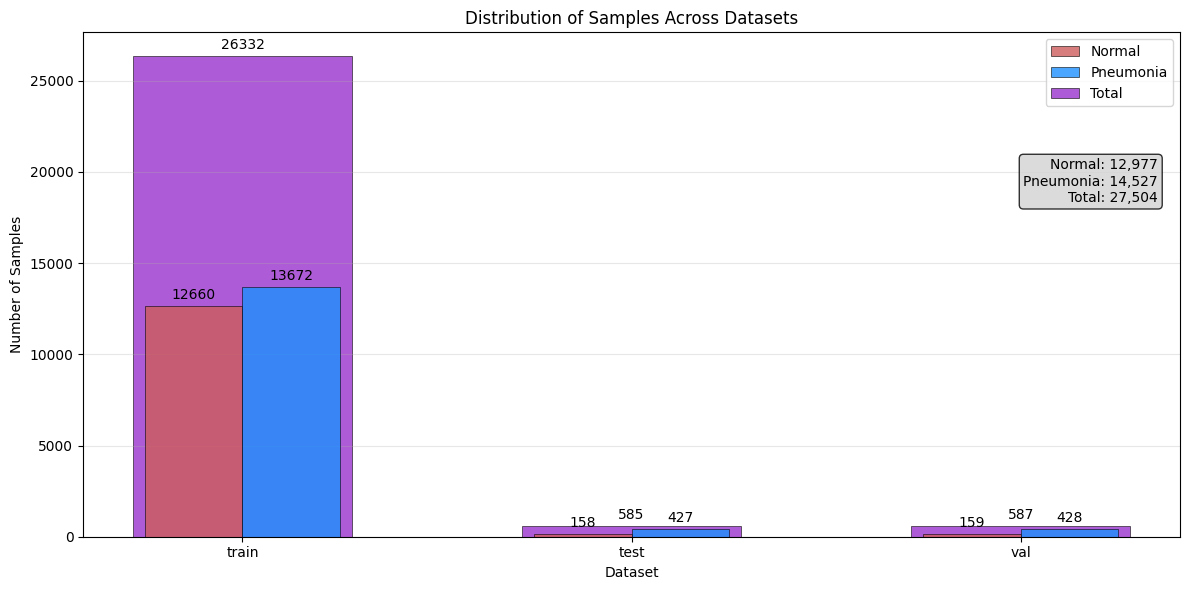

{'train': {'NORMAL': 12660, 'PNEUMONIA': 13672},
 'test': {'NORMAL': 158, 'PNEUMONIA': 427},
 'val': {'NORMAL': 159, 'PNEUMONIA': 428}}

In [6]:
plot_dataset_distribution(SPLIT_DIR)

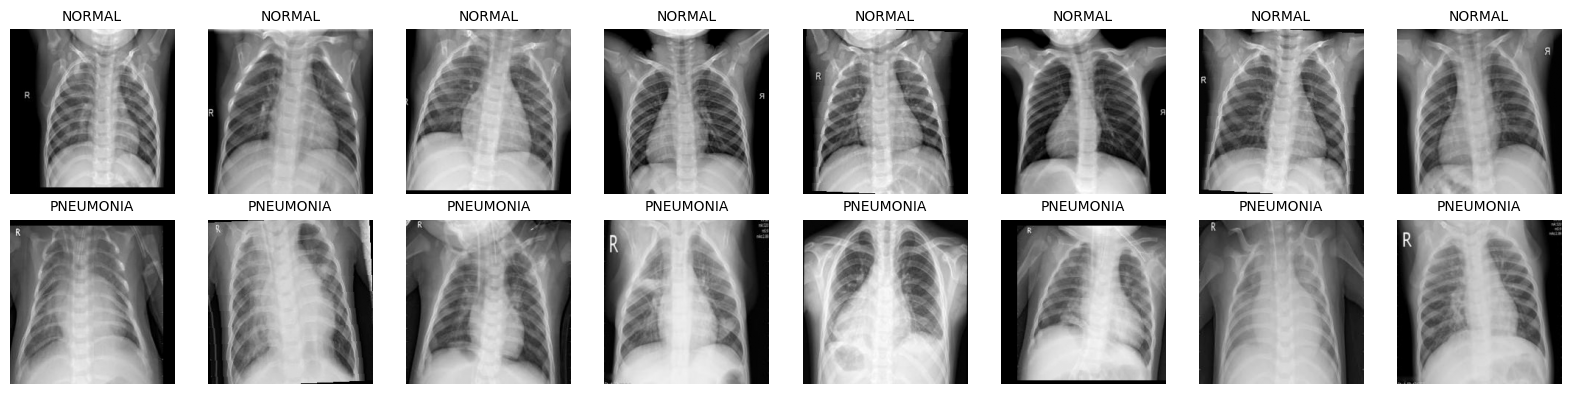

In [9]:
plot_image_grid_all_subsets(
    base_dir=SPLIT_DIR,
    n=16
)